In [25]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib.pyplot import *
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as grp
from sklearn.linear_model import LinearRegression,Lasso
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.neighbors import KNeighborsClassifier
from scipy import stats

import warnings
warnings.filterwarnings('ignore')


In [26]:
df= pd.read_csv('aggregate_covid_country.csv')
df

,Date,Country,Confirmed,Recovered,Deaths
0,2020-01-22,Afghanistan,0,0,0
1,2020-01-22,Albania,0,0,0
2,2020-01-22,Algeria,0,0,0
3,2020-01-22,Andorra,0,0,0
4,2020-01-22,Angola,0,0,0
...,...,...,...,...,...
23683,2020-05-26,West Bank and Gaza,429,365,3
23684,2020-05-26,Western Sahara,9,6,1
23685,2020-05-26,Yemen,249,10,49
23686,2020-05-26,Zambia,920,336,7


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23688 entries, 0 to 23687
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Date       23688 non-null  object
 1   Country    23688 non-null  object
 2   Confirmed  23688 non-null  int64 
 3   Recovered  23688 non-null  int64 
 4   Deaths     23688 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 925.4+ KB


In [28]:
df.isnull().sum()

Date         0
Country      0
Confirmed    0
Recovered    0
Deaths       0
dtype: int64

In [29]:
df.shape

(23688, 5)

In [30]:
df['Country'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Brunei', 'Bulgaria', 'Burkina Faso', 'Burma', 'Burundi',
       'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Comoros', 'Congo (Brazzaville)', 'Congo (Kinshasa)', 'Costa Rica',
       "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Czechia', 'Denmark',
       'Diamond Princess', 'Djibouti', 'Dominica', 'Dominican Republic',
       'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea',
       'Estonia', 'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France',
       'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece',
       'Grenada', 'Guatemala', 'Guin

In [31]:
df.Country.value_counts().sort_index()

Afghanistan           126
Albania               126
Algeria               126
Andorra               126
Angola                126
                     ... 
West Bank and Gaza    126
Western Sahara        126
Yemen                 126
Zambia                126
Zimbabwe              126
Name: Country, Length: 188, dtype: int64

In [32]:
df.tail(8)

,Date,Country,Confirmed,Recovered,Deaths
23680,2020-05-26,Uzbekistan,3290,2636,14
23681,2020-05-26,Venezuela,1211,302,11
23682,2020-05-26,Vietnam,327,272,0
23683,2020-05-26,West Bank and Gaza,429,365,3
23684,2020-05-26,Western Sahara,9,6,1
23685,2020-05-26,Yemen,249,10,49
23686,2020-05-26,Zambia,920,336,7
23687,2020-05-26,Zimbabwe,56,25,4


In [33]:
df

,Date,Country,Confirmed,Recovered,Deaths
0,2020-01-22,Afghanistan,0,0,0
1,2020-01-22,Albania,0,0,0
2,2020-01-22,Algeria,0,0,0
3,2020-01-22,Andorra,0,0,0
4,2020-01-22,Angola,0,0,0
...,...,...,...,...,...
23683,2020-05-26,West Bank and Gaza,429,365,3
23684,2020-05-26,Western Sahara,9,6,1
23685,2020-05-26,Yemen,249,10,49
23686,2020-05-26,Zambia,920,336,7


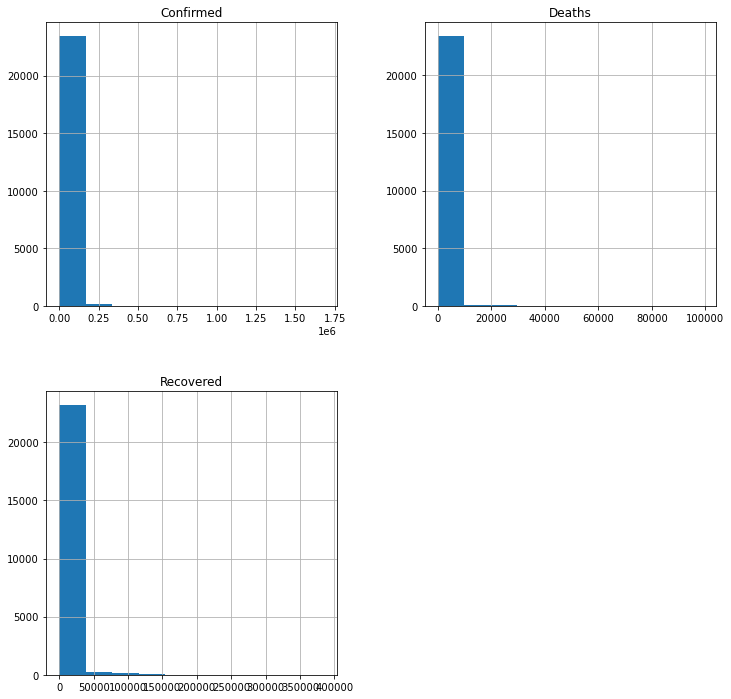

In [34]:
df.hist(figsize=(12,12));

Confirmed       AxesSubplot(0.125,0.71587;0.168478x0.16413)
Recovered    AxesSubplot(0.327174,0.71587;0.168478x0.16413)
Deaths       AxesSubplot(0.529348,0.71587;0.168478x0.16413)
dtype: object

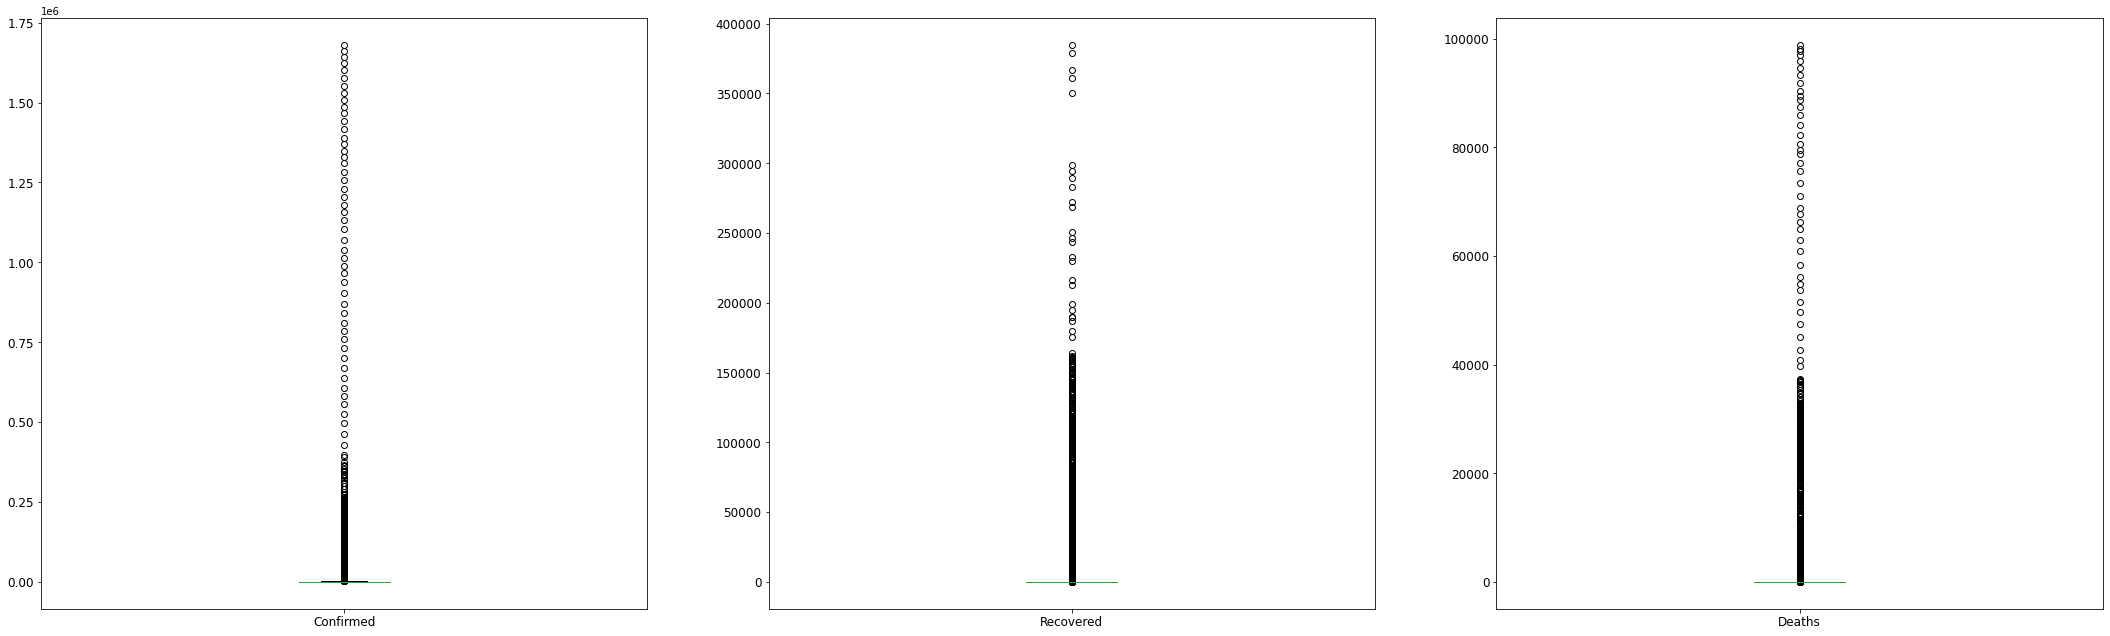

In [35]:
df.plot(kind='box', subplots=True, layout=(4,4), fontsize=12,figsize=(50,50))

Here we can see that there are many outliers and thas why in histogram looks like skewed

in above we can see that maximum number of death recoverd and conferm cases are showed in dark Red where minimum number in light Red 

In [36]:
df1 = pd.DataFrame(df,columns=['Confirmed','Recovered','Deaths'])
sum_column = df1.sum(axis=0)
print (sum_column)

Confirmed    188778378
Recovered     61157719
Deaths        12482037
dtype: int64


In above graph we can easily see that heighest Numbber of deaths lead by US and followed by UK, Italy and Spain

In [37]:
x = df.drop('Deaths', axis=1)
df['Deaths']= df['Deaths'].astype('category')
y = df['Deaths']

x = df.drop('Date', axis=1)


In [38]:
le = LabelEncoder()
x['Country'] = le.fit_transform(x.Country.values)

We use label encodr here for converting string data of country to numbers so we can process data 

In [39]:
print(x)

       Country  Confirmed  Recovered Deaths
0            0          0          0      0
1            1          0          0      0
2            2          0          0      0
3            3          0          0      0
4            4          0          0      0
...        ...        ...        ...    ...
23683      183        429        365      3
23684      184          9          6      1
23685      185        249         10     49
23686      186        920        336      7
23687      187         56         25      4

[23688 rows x 4 columns]


In [40]:
x.shape

(23688, 4)

In [41]:
y.shape

(23688,)

In [42]:
x_train, x_test,y_train,y_test=train_test_split(x,y,test_size=0.30, random_state=0)
df.shape

(23688, 5)

We split data here in Training and Testing with test size of 0.30

In [43]:
x_train.shape

(16581, 4)

In [44]:
y_train.shape

(16581,)

In [45]:
import sklearn
from sklearn.svm import SVC
from sklearn.metrics import explained_variance_score,r2_score,mean_tweedie_deviance

import warnings
warnings.filterwarnings('ignore')

model=[LinearRegression(), Lasso(),KNeighborsClassifier()]


for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    predm=m.predict(x_test)
    print(' Score = \n',m,'is :')
    print(explained_variance_score(y_test,predm))
    print(r2_score(y_test,predm))
    print(mean_tweedie_deviance(y_test,predm))
    print('\n')

 Score = 
 LinearRegression() is :
1.0
1.0
1.9708973761106942e-23


 Score = 
 Lasso() is :
0.9999999513657923
0.9999999513654859
0.8005139720645416


 Score = 
 KNeighborsClassifier() is :
0.9735594063608071
0.9730325948610297
443877.8720979316




Here we can see that Linear Rigression model giving us more acurate result

In [46]:
df.corr()

,Confirmed,Recovered
Confirmed,1.000000,0.810991
Recovered,0.810991,1.000000


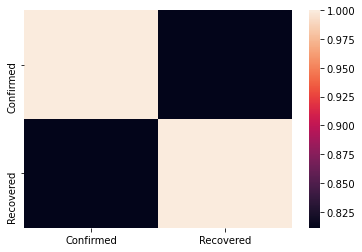

In [47]:
corr = df.corr()
sns.heatmap(corr)

plt.figure(figsize=(12,5))
sns.heatmap(df.corr(),annot=True,cmap="PuBuGn")

Here we can see the correlation between confirmed cases of covid and Recoverd cases